<a href="https://colab.research.google.com/github/UKD1211/100_days_ML_cX_ISI_DS/blob/main/Binning_binarization_day_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('/content/train.csv',usecols = ['Age','Fare','Survived'])

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:

clf = DecisionTreeClassifier()

In [12]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:

accuracy_score(y_test,y_pred)

0.6293706293706294

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6302816901408451)

In [15]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [16]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [17]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [18]:

trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [19]:

output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [20]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [21]:
output.sample(5)

,age,age_trf,fare,fare_trf
155,51.0,13.0,61.3792,12.0
710,24.0,5.0,49.5042,11.0
548,33.0,9.0,20.5250,8.0
854,44.0,12.0,26.0000,9.0
179,36.0,10.0,0.0000,0.0


In [22]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [23]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
105,28.0,7.0,7.8958,3.0,"(25.0, 28.0]","(7.775, 7.896]"
288,42.0,12.0,13.0000,6.0,"(38.0, 42.0]","(10.5, 13.0]"
708,22.0,4.0,151.5500,14.0,"(21.0, 23.0]","(108.9, 512.329]"
116,70.5,14.0,7.7500,1.0,"(54.0, 80.0]","(7.25, 7.775]"
707,42.0,12.0,26.2875,9.0,"(38.0, 42.0]","(26.0, 26.55]"


In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [25]:

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [27]:

X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6359154929577464)

In [28]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6303403755868543


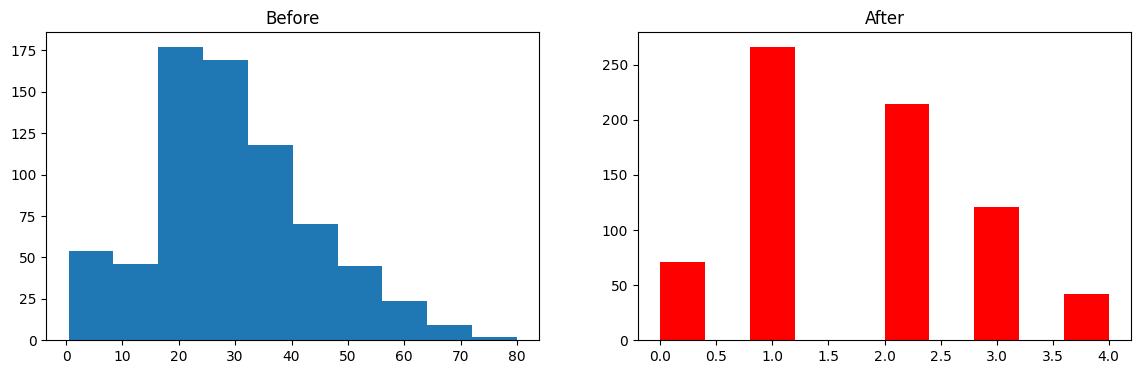

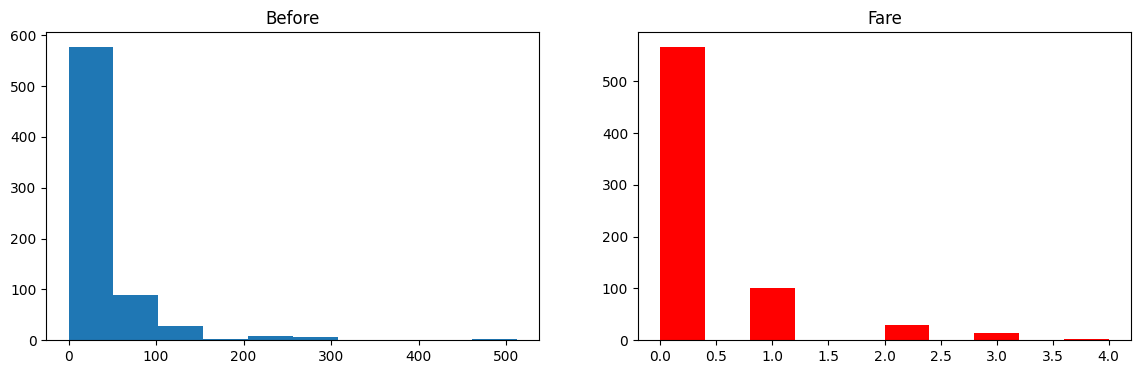

In [29]:

discretize(5,'kmeans')

0.6246870109546165


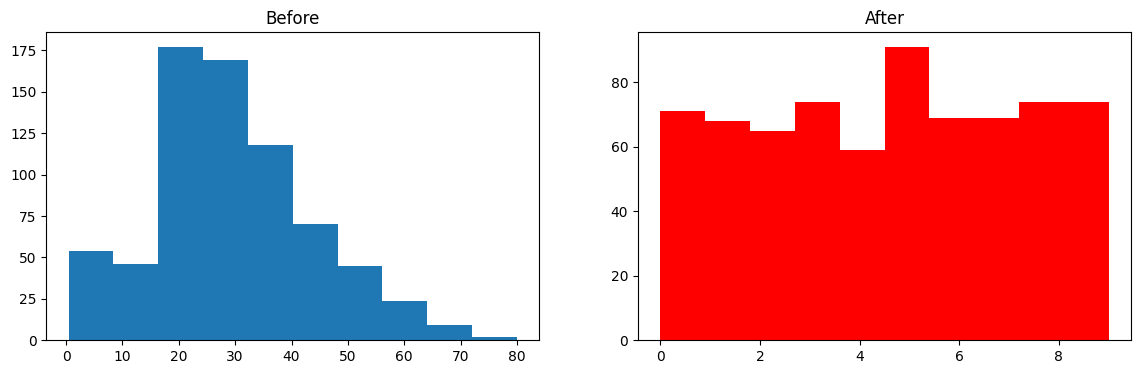

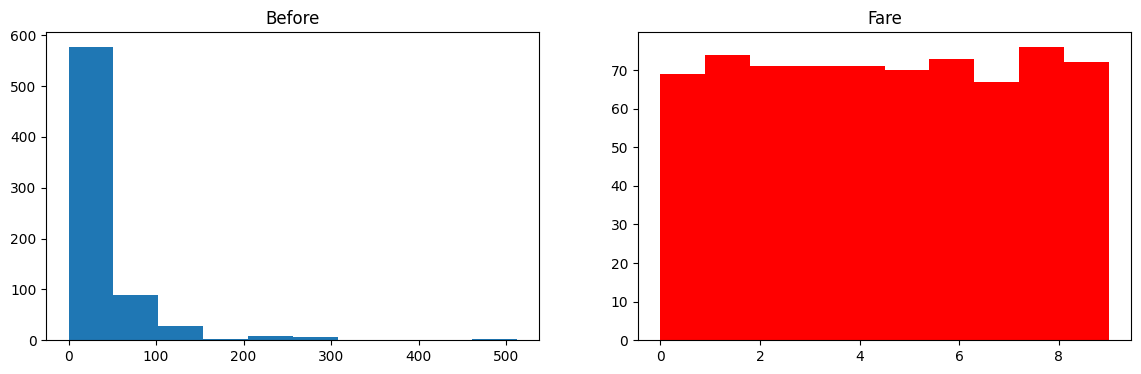

In [30]:
discretize(10,'quantile')

0.6317097026604068


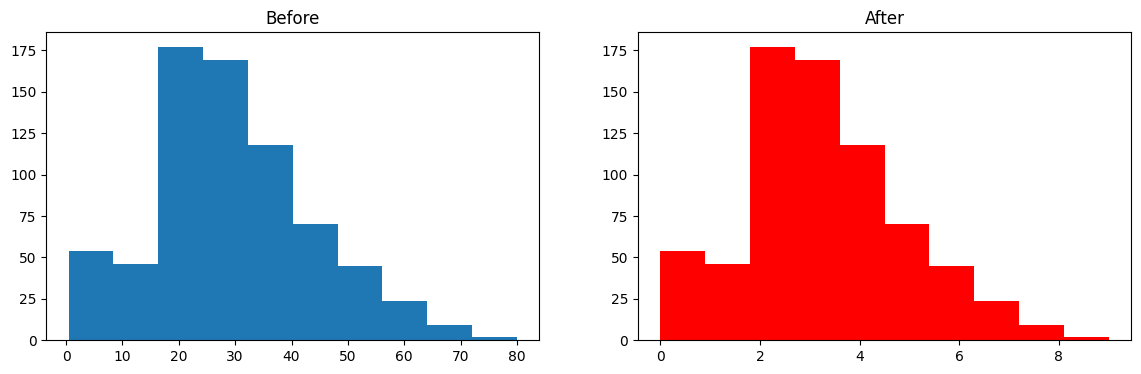

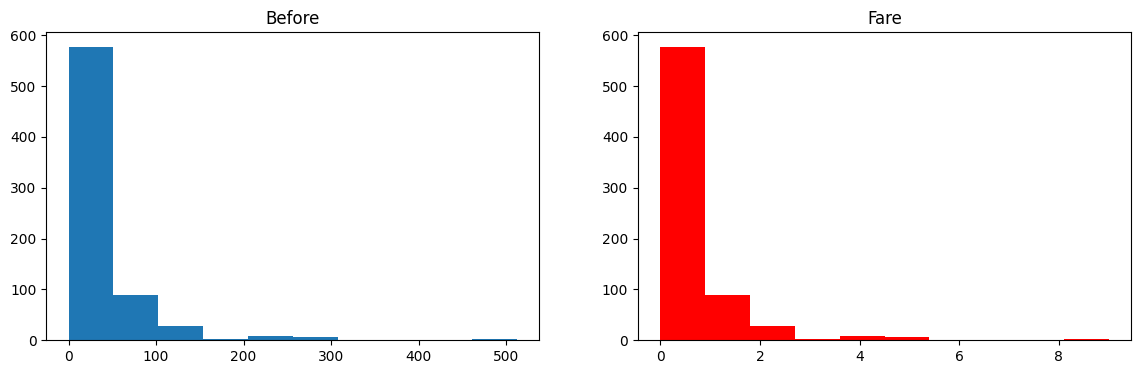

In [31]:
discretize(10,'uniform')